In [3]:
from cmdstanpy import CmdStanModel


import arviz as az
import numpy as np
import scipy.stats as stats

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn import datasets, linear_model

In [4]:
_BASE_URL = "https://raw.githubusercontent.com/rmcelreath/rethinking/Experimental/data"
HOWELL_DATASET_PATH = f"{_BASE_URL}/Howell1.csv"
d = pd.read_csv(HOWELL_DATASET_PATH, sep=';', header=0)
d=d[d.age>=18] #just adults 
d.head()

,height,weight,age,male
0,151.765,47.825606,63.0,1
1,139.700,36.485807,63.0,0
2,136.525,31.864838,65.0,0
3,156.845,53.041914,41.0,1
4,145.415,41.276872,51.0,0


In [3]:
model_ppc=CmdStanModel(stan_file='height_1_ppc.stan')

R = 1000
sim=model_ppc.sample(iter_sampling=R,
                     iter_warmup=0,
                     chains=1,
                     fixed_param=True,
                     seed=29042020,refresh=R)

INFO:cmdstanpy:found newer exe file, not recompiling
INFO:cmdstanpy:CmdStan start processing
chain 1 |██████████| 00:00 Sampling completed


INFO:cmdstanpy:CmdStan done processing.


## Task1. Prior predictive checks

In [4]:
df = sim.draws_pd()
df

,lp__,accept_stat__,mu,sigma,height
0,0.0,0.0,232.163,8.126140,217.968
1,0.0,0.0,188.640,70.331700,297.765
2,0.0,0.0,170.755,11.778900,178.482
3,0.0,0.0,182.602,19.518000,217.971
4,0.0,0.0,152.394,4.678490,159.762
...,...,...,...,...,...
995,0.0,0.0,178.704,0.038448,178.692
996,0.0,0.0,172.086,5.345250,171.941
997,0.0,0.0,188.423,12.742400,183.248
998,0.0,0.0,154.132,4.810070,151.071


## Task 1.1

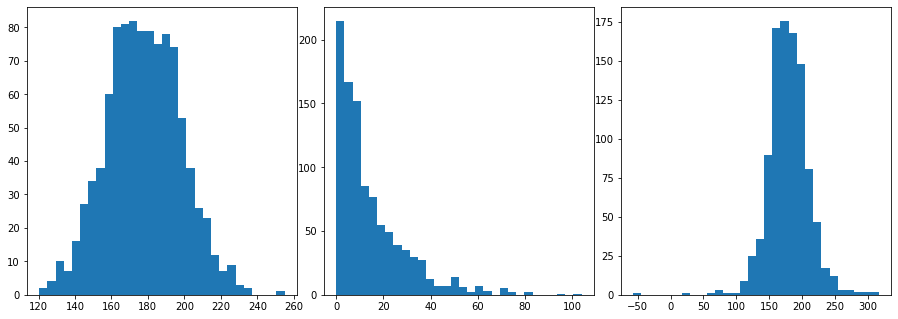

In [5]:
bin =30
mu = sim.stan_variable('mu')
sigma = sim.stan_variable('sigma')
height = sim.stan_variable('height')

fig,axs = plt.subplots(1,3,figsize=(15,5))
axs[0].hist(mu ,bins = bin)
axs[1].hist(sigma,bins = bin)
axs[2].hist(height, bins = bin)
plt.subplots_adjust(left=0.1, bottom=0.1, right=0.9, top=0.9, wspace=0.1, hspace=0.1)

## Task 1.2


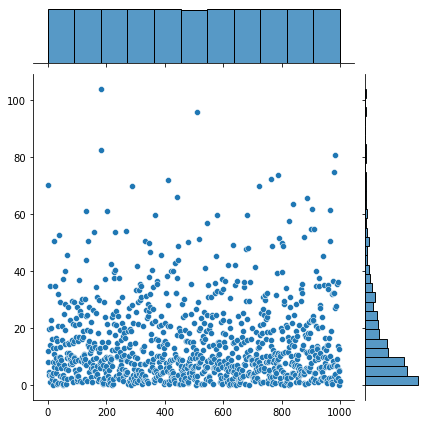

In [6]:
sns.jointplot(data = sigma)

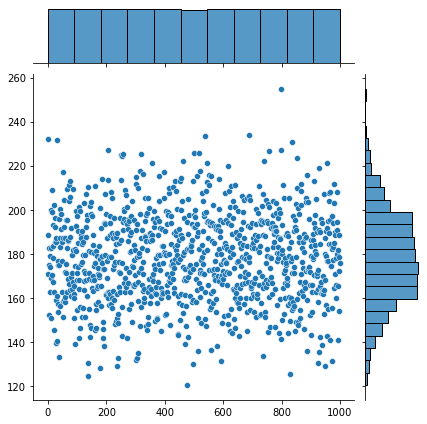

In [7]:
sns.jointplot(data = mu)


## Task 1.3 & 1.4

No 

## Task 2
1. Plot a joint distribution of fitted mu and sigma.
2. Plot histograms of data and simulated heights and evaluate the quality of model.

In [8]:
model_1_fit=CmdStanModel(stan_file='height_1_fit.stan')

INFO:cmdstanpy:found newer exe file, not recompiling


In [9]:
fit=model_1_fit.sample(data=dict(N=len(d),
                                   heights=d.height.values),
                         seed=28052020)

INFO:cmdstanpy:CmdStan start processing
chain 1 |          | 00:00 Status


chain 1 |▉         | 00:00 Iteration:    1 / 2000 [  0%]  (Warmup)


chain 1 |█████▉    | 00:00 Iteration: 1001 / 2000 [ 50%]  (Sampling)


chain 1 |██████████| 00:00 Sampling completed                       
chain 2 |██████████| 00:00 Sampling completed                       

chain 3 |██████████| 00:00 Sampling completed
chain 4 |██████████| 00:00 Sampling completed                       


INFO:cmdstanpy:CmdStan done processing.


In [10]:
df1 = fit.draws_pd()
df1

,lp__,accept_stat__,stepsize__,treedepth__,n_leapfrog__,divergent__,energy__,mu,sigma,height
0,-896.475,0.989141,0.879734,3.0,7.0,0.0,898.035,155.103,8.10072,151.389
1,-895.714,0.996108,0.879734,2.0,3.0,0.0,896.915,154.992,7.57395,153.867
2,-896.343,0.895673,0.879734,2.0,3.0,0.0,897.119,155.228,7.90630,146.875
3,-895.404,0.991829,0.879734,2.0,3.0,0.0,896.577,154.815,7.56726,154.424
4,-895.849,0.841095,0.879734,2.0,3.0,0.0,896.865,154.890,8.04910,147.182
...,...,...,...,...,...,...,...,...,...,...
3995,-895.627,1.000000,0.838787,2.0,3.0,0.0,896.279,154.803,8.01422,144.451
3996,-895.727,0.982861,0.838787,1.0,1.0,0.0,895.799,154.755,8.05962,145.407
3997,-895.745,0.978395,0.838787,3.0,7.0,0.0,896.465,155.072,7.80211,165.997
3998,-895.541,0.984102,0.838787,2.0,7.0,0.0,896.007,154.218,7.76397,147.339


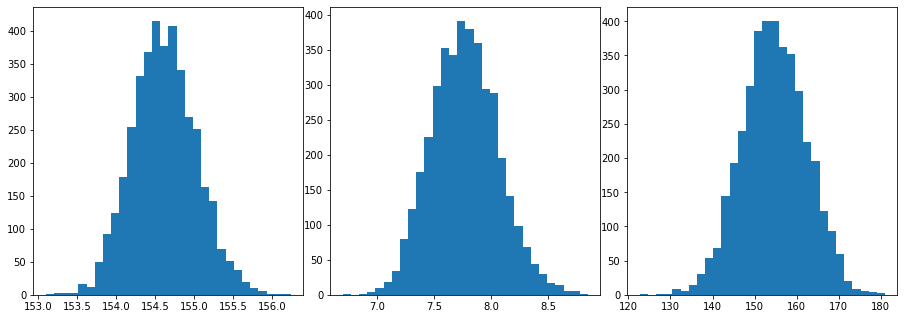

In [11]:
bin =30
mu = fit.stan_variable('mu')
sigma = fit.stan_variable('sigma')
height = fit.stan_variable('height')

fig,axs = plt.subplots(1,3,figsize=(15,5))
axs[0].hist(mu ,bins = bin)
axs[1].hist(sigma,bins = bin)
axs[2].hist(height, bins = bin)
plt.subplots_adjust(left=0.1, bottom=0.1, right=0.9, top=0.9, wspace=0.1, hspace=0.1)


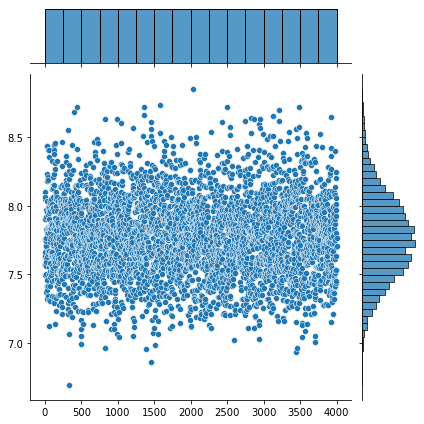

In [12]:
sns.jointplot(data = sigma)

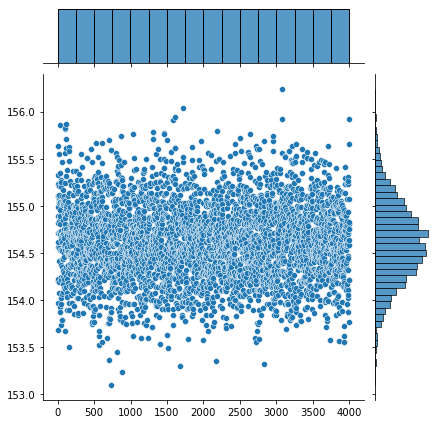

In [13]:
sns.jointplot(data = mu)


### Adding predictor to the model - weight

In [5]:
 d['c_weight'] = d['weight'] - d['weight'].mean()
d

,height,weight,age,male,c_weight
0,151.765,47.825606,63.0,1,2.835121
1,139.700,36.485807,63.0,0,-8.504679
2,136.525,31.864838,65.0,0,-13.125648
3,156.845,53.041914,41.0,1,8.051429
4,145.415,41.276872,51.0,0,-3.713614
...,...,...,...,...,...
534,162.560,47.031821,27.0,0,2.041335
537,142.875,34.246196,31.0,0,-10.744290
540,162.560,52.163080,31.0,1,7.172594
541,156.210,54.062497,21.0,0,9.072011


In [6]:
model_ppc=CmdStanModel(stan_file='height_2a_ppc.stan')
R = 1000

data_sim={'N':50, 'weight':np.linspace(d.c_weight.min(),d.c_weight.max())}
sim=model_ppc.sample(data=data_sim, 
                     iter_sampling=R, 
                     iter_warmup=0, 
                     chains=1, 
                     refresh=R,
                     fixed_param=True,
                     seed=29042020)

INFO:cmdstanpy:found newer exe file, not recompiling
INFO:cmdstanpy:CmdStan start processing
chain 1 |██████████| 00:00 Sampling completed                      


INFO:cmdstanpy:CmdStan done processing.


### Task 4 
1. Plot lines for each sampled slope beta and intercept alpha, verify if possible predicted heights are consistent with minimum (0) and maximum (check Wikipedia) heights observed in nature.

In [7]:
df = sim.draws_pd()
df

,lp__,accept_stat__,alpha,beta,sigma,height[1],height[2],height[3],height[4],height[5],...,height[41],height[42],height[43],height[44],height[45],height[46],height[47],height[48],height[49],height[50]
0,0.0,0.0,232.163,0.777181,23.208300,224.307,189.606,228.071,250.685,275.945,...,268.583,285.802,278.3380,249.1490,211.536,231.631,238.3190,262.867,252.269,261.092
1,0.0,0.0,154.022,-0.006780,0.086958,154.222,154.178,154.171,154.205,154.204,...,154.172,153.933,153.8520,153.9120,153.839,153.962,153.8220,153.900,154.017,153.893
2,0.0,0.0,169.461,-1.138640,20.358900,214.148,180.736,180.563,195.404,190.363,...,191.242,127.912,184.9650,160.2570,192.539,152.132,171.4460,159.588,148.893,153.309
3,0.0,0.0,158.357,-0.254452,6.415610,170.426,157.500,160.170,155.285,159.820,...,158.852,156.096,157.4510,163.9770,151.784,151.365,160.0010,151.036,156.545,151.490
4,0.0,0.0,158.131,1.671020,9.955320,108.885,130.072,129.245,130.434,152.113,...,194.067,192.554,173.3180,183.4590,181.401,179.371,179.6590,193.581,192.853,180.111
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.0,0.0,161.753,1.261300,6.017940,150.133,135.414,146.446,146.846,148.854,...,180.654,163.295,183.9520,177.6080,196.380,179.578,181.8730,195.683,181.097,178.390
996,0.0,0.0,196.362,1.223380,10.413300,186.314,186.621,176.581,183.650,168.386,...,206.321,217.850,218.2430,195.7830,223.757,210.757,194.7030,230.771,214.170,216.410
997,0.0,0.0,172.792,-0.272051,76.805200,139.163,272.530,237.396,184.075,199.179,...,119.115,136.265,215.0740,30.6534,177.662,232.106,81.1819,190.654,107.253,130.593
998,0.0,0.0,126.115,0.987160,23.204300,133.109,118.597,109.399,127.169,144.429,...,131.347,134.017,95.5687,120.2340,166.454,136.280,168.7340,117.519,111.263,148.882


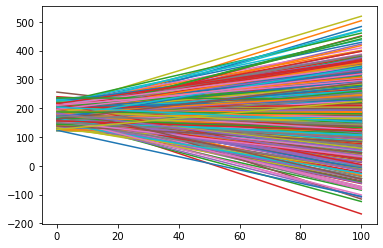

max:  463.537
min:  -162.44


In [25]:
alpha = sim.stan_variable('alpha')
beta = sim.stan_variable('beta')

for i in range(len(alpha)) :
    x = np.array([0, 100])
    y = beta[i] * x + alpha[i]
    plt.plot(x, y)
 
plt.show()

print('max: ', np.max(sim.stan_variable('height')))
print('min: ', np.min(sim.stan_variable('height')))

### Modifying prior

In [27]:
model_ppc=CmdStanModel(stan_file='height_2b_ppc.stan')

INFO:cmdstanpy:found newer exe file, not recompiling


In [28]:
sim=model_ppc.sample(data=data_sim, 
                     iter_sampling=R, 
                     iter_warmup=0, 
                     chains=1, 
                     refresh=R,
                     fixed_param=True,
                     seed=29042020)

INFO:cmdstanpy:CmdStan start processing
chain 1 |██████████| 00:00 Sampling completed                      


INFO:cmdstanpy:CmdStan done processing.


#### Task 5
1. Plot lines for each sampled slope beta and intercept alpha. Verify how uncertainity changes with increasing of sample (N)
2. For each simulated weight plot maximum, minimum, and 5, 25, 50, 75, 95 quantiles of simulated weight (all in the same plot). Compare with observed data (N points). Is observed data possible within the posterior model? What changes when N increases.



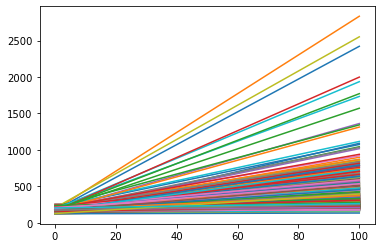

max:  668.345
min:  -200.322


In [32]:
alpha = sim.stan_variable('alpha')
beta = sim.stan_variable('beta')

for i in range(len(alpha)) :
    x = np.array([0, 100])
    y = beta[i] * x + alpha[i]
    plt.plot(x, y)
 
plt.show()

print('max: ', np.max(sim.stan_variable('height')))
print('min: ', np.min(sim.stan_variable('height')))

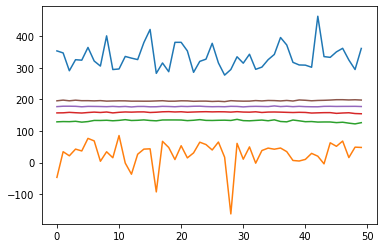

In [153]:

max = []
min = []

quantiles = {}
quantiles['q1'] = []
quantiles['q2'] = []
quantiles['q3'] = []
quantiles['q4'] = []
quantiles['q5'] = []
height = sim.stan_variable('height')
for i in range(height.shape[1]):
    heights = height[:,i] 
    max.append(np.max(heights))
    min.append(np.min(heights))

  
    quantiles['q1'].append(np.quantile(heights, 0.05))
    quantiles['q2'].append(np.quantile(heights, 0.25))
    quantiles['q3'].append(np.quantile(heights, 0.5))
    quantiles['q4'].append(np.quantile(heights, 0.75))
    quantiles['q5'].append(np.quantile(heights, 0.95))

plt.plot(max)
plt.plot(min)


for i in range(1,len(quantiles.keys())):
    plt.plot(quantiles['q'+str(i)])

plt.show()




### Fitting data 

In [33]:
model_2_fit=CmdStanModel(stan_file='height_2_fit.stan')


INFO:cmdstanpy:found newer exe file, not recompiling


In [34]:
N = 200
data_fit={'N': N, 'weight': d['weight'].head(N), 'heights': d['height'].head(N)}


fit=model_2_fit.sample(data=data_fit,seed=28052020)

INFO:cmdstanpy:CmdStan start processing
chain 1 |          | 00:00 Status



chain 1 |▍         | 00:00 Status
chain 1 |██▋       | 00:00 Iteration:  400 / 2000 [ 20%]  (Warmup)
chain 1 |█████     | 00:00 Iteration:  900 / 2000 [ 45%]  (Warmup)


chain 1 |█████▉    | 00:00 Iteration: 1001 / 2000 [ 50%]  (Sampling)









chain 1 |██████▊   | 00:01 Iteration: 1200 / 2000 [ 60%]  (Sampling)



chain 1 |███████▋  | 00:02 Iteration: 1400 / 2000 [ 70%]  (Sampling)

chain 1 |████████▏ | 00:02 Iteration: 1500 / 2000 [ 75%]  (Sampling)

chain 1 |████████▋ | 00:04 Iteration: 1600 / 2000 [ 80%]  (Sampling)



chain 1 |█████████ | 00:04 Iteration: 1700 / 2000 [ 85%]  (Sampling)


chain 1 |█████████▌| 00:05 Iteration: 1800 / 2000 [ 90%]  (Sampling)


chain 1 |██████████| 00:05 Iteration: 1900 / 2000 [ 95%]  (Sampling)







chain 1 |██████████| 00:06 Sampling completed                       
chain 2 |██████████| 00:06 Sampling completed                       
chain 3 |██████████| 00:06 Sampling


INFO:cmdstanpy:CmdStan done processing.


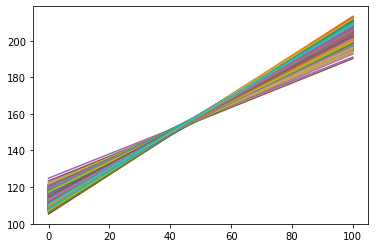

max:  668.345
min:  -200.322


In [35]:
alpha = fit.stan_variable('alpha')
beta = fit.stan_variable('beta')

for i in range(len(alpha)) :
    x = np.array([0, 100])
    y = beta[i] * x + alpha[i]
    plt.plot(x, y)
 
plt.show()

print('max: ', np.max(sim.stan_variable('height')))
print('min: ', np.min(sim.stan_variable('height')))

#### Task 7
1. Plot lines for each sampled slope beta and intercept alpha. Verify how uncertainity changes with increasing of sample (N)
2. For each simulated weight plot maximum, minimum, and 5, 25, 50, 75, 95 quantiles of simulated weight (all in the same plot). Compare with observed data (N points). Is observed data possible within the posterior model? What changes when N increases.



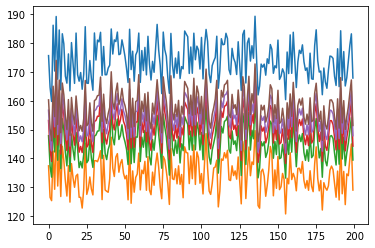

In [156]:
max = []
min = []

quantiles = {}
quantiles['q1'] = []
quantiles['q2'] = []
quantiles['q3'] = []
quantiles['q4'] = []
quantiles['q5'] = []
height = fit.stan_variable('height')
for i in range(height.shape[1]):
    heights = height[:,i] 
    max.append(np.max(heights))
    min.append(np.min(heights))

  
    quantiles['q1'].append(np.quantile(heights, 0.05))
    quantiles['q2'].append(np.quantile(heights, 0.25))
    quantiles['q3'].append(np.quantile(heights, 0.5))
    quantiles['q4'].append(np.quantile(heights, 0.75))
    quantiles['q5'].append(np.quantile(heights, 0.95))

plt.plot(max)
plt.plot(min)


for i in range(1,len(quantiles.keys())):
    plt.plot(quantiles['q'+str(i)])

plt.show()